In [1]:
# loca test train script
import os
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf 

In [6]:
fruits =['apple','banana','blackberry','blueberry','grapes','pear','pineapple','strawberry','watermelon']
data_loc = '../../data/full_numpy_bitmap_'

In [4]:
test = np.load(data_loc+fruits[0]+'.npy')

In [5]:
test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  11,  21,  12,   0,   0,   0,   0,   0,   0,   0,
         0,  92,  20,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  91, 213, 253, 255, 255, 222,  95,   3,   0,   0,
         0,   0,   7, 255, 222,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  24, 190, 255, 196, 118, 100, 109, 196, 255, 121,
         0,   0,   0,   0,   0, 141,  35,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   1, 185, 241,  94,   1,   0,   0,   0,   0,
        63,  25,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  89, 255, 115, 133, 150,  37,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 207, 241, 252, 25

In [6]:
X = np.empty([0, 784])
y = np.empty([0])
i=0
for fruit in fruits:
    drawings = np.load(data_loc+fruit+'.npy')
    # drawings = drawings[0: 5000, :]

    labels = np.full(drawings.shape[0], i)

    X = np.concatenate((X, drawings), axis=0)
    y = np.append(y, labels)

    X /= 255.0
    i += 1

138825
apple


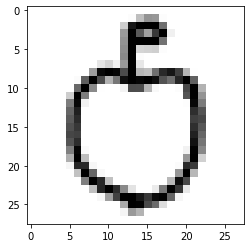

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
i =10
print(i)
plt.imshow(X[i].reshape(28,28), cmap='binary')
print(fruits[int(y[i].item())])


In [8]:
y.shape[0]

1361209

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.20, random_state=24)


In [10]:
X_train_tf = tf.reshape(X_train, [-1,28,28,1])
X_test_tf = tf.reshape(X_test, [-1,28,28,1])

In [12]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(fruits))
y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(fruits))
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

In [13]:
print(f'{y_test.shape}.{y_train.shape}')
print(f'{X_test_tf.shape},{X_train_tf.shape}')
y_train.shape

(272242, 9).(1088967, 9)
(272242, 28, 28, 1),(1088967, 28, 28, 1)


TensorShape([1088967, 9])

In [14]:
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3,3),
                               padding='same',
                               input_shape=X_train_tf.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Convolution2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Convolution2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(150, activation='relu'))
model.add(layers.Dense(9, activation='softmax'))

adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
            
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [15]:
model.fit(x=X_train_tf, y=y_train, batch_size=256, validation_split=0.1, verbose=2, epochs=6)

Epoch 1/6
3829/3829 - 193s - loss: 1.6322 - accuracy: 0.3841 - val_loss: 1.5313 - val_accuracy: 0.4127
Epoch 2/6
3829/3829 - 188s - loss: 1.5318 - accuracy: 0.4138 - val_loss: 1.5313 - val_accuracy: 0.4127
Epoch 3/6
3829/3829 - 195s - loss: 1.5282 - accuracy: 0.4142 - val_loss: 1.5310 - val_accuracy: 0.4127
Epoch 4/6
3829/3829 - 191s - loss: 1.5280 - accuracy: 0.4142 - val_loss: 1.5304 - val_accuracy: 0.4127
Epoch 5/6
3829/3829 - 191s - loss: 1.5278 - accuracy: 0.4142 - val_loss: 1.5297 - val_accuracy: 0.4127
Epoch 6/6
3829/3829 - 191s - loss: 1.5320 - accuracy: 0.4141 - val_loss: 1.5298 - val_accuracy: 0.4127


In [16]:
score = model.evaluate(X_test_tf, y_test, verbose=0)
print('Test accuracy: {:0.2f}%'.format(score[1] * 100))

Test accuracy: 41.23%


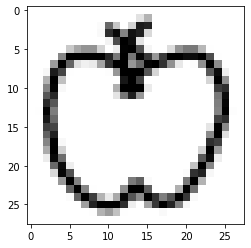

In [124]:
plt.imshow(X_test[150].reshape(28,28), cmap='binary')

In [125]:
testPic = X_test[150].reshape(1,28, 28,1).astype('float32')

In [100]:
testPic[0][0]

array([0.], dtype=float32)

In [81]:
X_train_28.shape[1:]

(28, 28, 1)

In [108]:
testPic[0][0][0]

array([0.], dtype=float32)

In [126]:
model.predict(testPic)

array([[1.3380073e-01, 2.7204397e-01, 1.1891171e-01, 1.1766133e-01,
        1.3962823e-01, 1.0592937e-01, 1.1197846e-01, 4.5252724e-05,
        9.0928364e-07]], dtype=float32)

In [18]:
zeros =np.zeros([28,28])

In [19]:
zeros_tf=tf.reshape(zeros, [-1,28,28,1])

In [129]:
model.predict(zeros.reshape(1,28, 28,1).astype('float32'))

array([[1.3380073e-01, 2.7204397e-01, 1.1891171e-01, 1.1766133e-01,
        1.3962823e-01, 1.0592937e-01, 1.1197846e-01, 4.5252724e-05,
        9.0928364e-07]], dtype=float32)

In [130]:
model.save('fruits.h5')

In [131]:
import tensorflowjs as tfjs

In [132]:
tfjs.converters.save_keras_model(model, './fruit/')

In [2]:
model25 = tf.keras.models.load_model('../easy30/kerasEasy30.h5')

In [6]:
model25.predict(zeros_tf)

NameError: name 'zeros_tf' is not defined

In [30]:
ones =np.ones([28,28])
ones_tf=tf.reshape(ones, [-1,28,28,1])

In [31]:
model25.predict(ones_tf)

array([[0.01077043, 0.00528294, 0.0422294 , 0.00478501, 0.00784956,
        0.00446659, 0.00449696, 0.00616009, 0.01704045, 0.01679914,
        0.09740496, 0.01264831, 0.07147717, 0.00620979, 0.00905091,
        0.01469143, 0.02118823, 0.06661362, 0.11920557, 0.00950107,
        0.21063401, 0.13450651, 0.02310882, 0.01046708, 0.01300051,
        0.02887199, 0.01105629, 0.00411572, 0.00579259, 0.01057484]],
      dtype=float32)

In [7]:
test = np.load(data_loc+'bird'+'.npy')

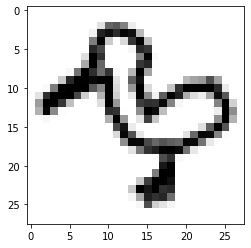

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(test[15].reshape(28,28), cmap='binary')

In [9]:
prediction = model25.predict(tf.expand_dims(tf.reshape(test[15].astype('float32'),[28,28,1]),0))
prediction

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]],
      dtype=float32)

In [18]:
earlyPredictor = tf.keras.Model(model25.input, model25.layers[0].output)

In [16]:
model25.layers[0].output

<tf.Tensor 'conv2d/Identity:0' shape=(None, 28, 28, 16) dtype=float32>

In [26]:
earlyPredictor(tf.expand_dims(tf.reshape(test[15].astype('float32'),[28,28,1]),0))[0]

<tf.Tensor: shape=(28, 28, 16), dtype=float32, numpy=
array([[[0.0033396, 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.0033396, 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.0033396, 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        ...,
        [0.0033396, 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.0033396, 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.0033396, 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]],

       [[0.0033396, 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.0033396, 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.0033396, 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        ...,
        [0.0033396, 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.0033396

In [48]:
weights=model25.layers[0].get_weights()
weights[1]

array([ 0.0033396 , -0.00656337, -0.002486  , -0.22032948, -0.18139   ,
       -0.15815274, -0.15932396, -0.03122642, -0.0243921 , -0.21433252,
       -0.11201883, -0.01685519, -0.0723272 , -0.01468499, -0.01628011,
       -0.00715846], dtype=float32)

In [49]:
weights[0]

array([[[[-0.16053987, -0.01696151, -0.13195609, -0.1007449 ,
           0.04488418,  0.12038724, -0.05424661, -0.09064208,
           0.10231151,  0.06592949,  0.09882298, -0.31661108,
          -0.09143399,  0.15551819, -0.14046447,  0.15649532]],

        [[ 0.21475159, -0.11610334,  0.33608988, -0.08478241,
           0.1148032 ,  0.05999648,  0.14592205, -0.14693746,
           0.29830799,  0.07562134,  0.08061723,  0.16737232,
           0.07044883,  0.03287732, -0.2543688 ,  0.08179861]],

        [[-0.07714632,  0.13068104, -0.22261408,  0.14402829,
          -0.06249876,  0.0916011 ,  0.03560975, -0.24664691,
           0.14914635,  0.04527962, -0.10653634,  0.09615467,
           0.14309093, -0.21669047,  0.09087022, -0.13092278]]],


       [[[ 0.2075569 ,  0.13374732, -0.21564665, -0.14430381,
           0.12677598,  0.10928212,  0.01151757,  0.07105356,
          -0.34568447,  0.09585033, -0.15463929,  0.06031884,
          -0.21149297,  0.02783475, -0.04297303, -0.1809310

In [41]:
earlyPredictor(ones_tf)[0][0][0]

<tf.Tensor: shape=(16,), dtype=float32, numpy=
array([0.        , 0.        , 0.30979642, 0.17198338, 0.1849082 ,
       0.        , 0.        , 0.36785498, 0.        , 0.        ,
       0.30501375, 0.        , 0.42654175, 0.00669096, 0.16783169,
       0.11254662], dtype=float32)>